In [1]:
import time
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("data/winequality.csv")
print(data.shape)
X = data.iloc[:,:11]
y = data.iloc[:,11]
train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size=0.15)
train_X,val_X,train_y,val_y = train_test_split(train_X,train_y,test_size=0.2,random_state=0)

(3918, 13)


In [3]:
C_list = [ 1,5, 10, 30,50 ,100]
K_list = ['linear','rbf']
accuracy = dict()
accuracy['linear'] = dict()
accuracy['poly'] = dict()
accuracy['rbf'] = dict()

t_accuracy = dict()
t_accuracy['linear'] = dict()
t_accuracy['poly'] = dict()
t_accuracy['rbf'] = dict()

best_info = ()
best_accuracy = 0
for c in C_list:
    for k in K_list:
        linear_svm = svm.SVC(kernel=k,C=c)
        linear_svm.fit(train_X, train_y)
        predictions = linear_svm.predict(val_X)
        train_prediction = linear_svm.predict(train_X)
    
        accu = accuracy_score(predictions,val_y)
        t_accu = accuracy_score(train_prediction,train_y)
        
        accuracy[k][c] = accu
        t_accuracy[k][c] = t_accu
        
        if accu > best_accuracy:
            best_accuracy = accu
            best_info = (k,c)
        print("C: ",c," Kernel: ",k," Accuracy: ",accu)
print("best info c:", best_info[1]," k: ",best_info[0]," accuracy:", best_accuracy)

C:  1  Kernel:  linear  Accuracy:  0.503003003003003


C:\Users\cluah\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:  1  Kernel:  rbf  Accuracy:  0.5330330330330331
C:  5  Kernel:  linear  Accuracy:  0.5015015015015015


C:\Users\cluah\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:  5  Kernel:  rbf  Accuracy:  0.5435435435435435
C:  10  Kernel:  linear  Accuracy:  0.5015015015015015


C:\Users\cluah\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:  10  Kernel:  rbf  Accuracy:  0.539039039039039
C:  30  Kernel:  linear  Accuracy:  0.506006006006006


C:\Users\cluah\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:  30  Kernel:  rbf  Accuracy:  0.5330330330330331
C:  50  Kernel:  linear  Accuracy:  0.515015015015015


C:\Users\cluah\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:  50  Kernel:  rbf  Accuracy:  0.5330330330330331
C:  100  Kernel:  linear  Accuracy:  0.5195195195195195


C:\Users\cluah\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C:  100  Kernel:  rbf  Accuracy:  0.5330330330330331
best info c: 5  k:  rbf  accuracy: 0.5435435435435435


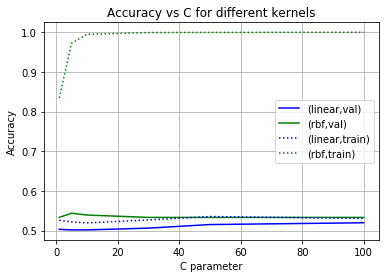

In [9]:
l = list()
p = list()
r = list()
tl = list()
tp = list()
tr = list()
for c in C_list:
    l.append(accuracy['linear'][c])
    #p.append(accuracy['poly'][c])
    r.append(accuracy['rbf'][c])
    tl.append(t_accuracy['linear'][c])
    #tp.append(t_accuracy['poly'][c])
    tr.append(t_accuracy['rbf'][c])
    
plt.grid()    
plt.plot([1,5,10,30,50 ,100], l, 'b-', label = "(linear,val)")
#plt.plot([1,5,10,30,50 ,100], p, 'b-', label = "(poly,val)")
plt.plot([1,5,10,30,50 ,100], r, 'g-', label = "(rbf,val)")
plt.plot([1,5,10,30,50 ,100], tl, 'b:', label = "(linear,train)")
#plt.plot([1,5,10,30,50 ,100], tp, 'b:', label = "(poly,train)")
plt.plot([1,5,10,30,50 ,100], tr, 'g:', label = "(rbf,train)")

plt.ylabel('Accuracy')
plt.xlabel('C parameter')
plt.title('Accuracy vs C for different kernels')
plt.legend()
plt.show()

In [10]:
start = time.clock()
linear_svm = svm.SVC(kernel='rbf',C=best_info[1])
linear_svm.fit(train_X, train_y)
elapsed = (time.clock() - start)
predictions = linear_svm.predict(test_X)
accu = accuracy_score(predictions,test_y)
print("svm accuracy: ",accu," time used: ",elapsed)

C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\cluah\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svm accuracy:  0.5391156462585034  time used:  1.0297267999994801


C:\Users\cluah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
